After I download tweets archive for `@dog_rate` twitter account, I went through twitter API to collect more data about this account, then I download [this file](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv) which contain image prediction for `@dog_rate` account. 
let's give you a context, `@dog_rate` is a twitter account that rating dogs, so anyone can send his/her dog image then this account rate it, now I'll do some visualization and highlighting insights.

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [6]:
tweets_df = pd.read_csv('twitter_archive_master.csv',index_col=0)

here are the columns on our data 
- tweet info 
    - `tweet_id`,
    - `timestamp` ,
    - `text`,
    - `retweeted_status_id`,
    - `retweeted_status_user_id` ,
    - `retweeted_status_timestamp`,
 
 
- dog info 
    - `rating_numerator`,
    - `name`,
    - `characteristic` ,
    - `retweet_count`,
    - `favorite_count` ,
    - `jpg_url` ,
    
    
- prediction info
    - `img_num` ,
    - `prediction_1`,
    - `confidence_1`,
    - `is_dog_1`,
    - `prediction_2`,
    - `confidence_2` ,
    - `is_dog_2`,
    - `prediction_3`,
    - `confidence_3` ,
    - `is_dog_3`
    
First I'm intresetd to know the distribution of retweets and favorites for tweets

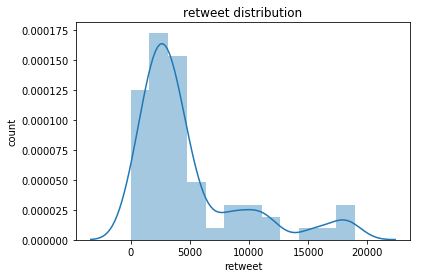

In [15]:
fig = sns.distplot(tweets_df.retweet_count).set_title("retweet distribution")
plt.xlabel('retweet') 
plt.ylabel('count')
plt.show(fig)

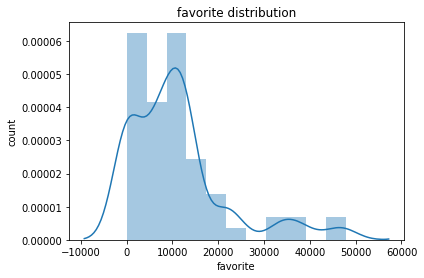

In [16]:
fig = sns.distplot(tweets_df.favorite_count).set_title("favorite distribution")
plt.xlabel('favorite') 
plt.ylabel('count')
plt.show(fig)

From above two charts, we can see that both distribution has skewness, right tail skew. also we can see that favorite exceed 50000, but retweet not more than 20000

Sounds good, What about rating distribution?

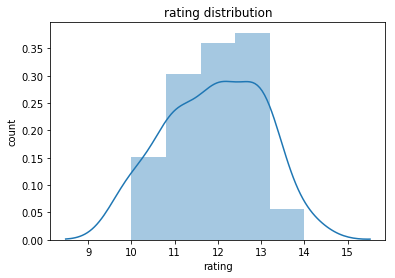

In [17]:
fig = sns.distplot(tweets_df.rating_numerator).set_title("rating distribution")
plt.xlabel('rating') 
plt.ylabel('count')
plt.show(fig)

Rating distribution looks like more normally distributed, and most of dogs get rating socre between 11 and 13.

let's look on something else interesting, is the number of  retweet more or the number of favorite?

In [23]:
# sum of favorite
print('number of favorites is ' + str(tweets_df.favorite_count.sum()))

number of favorites is 732520


In [24]:
# sum of retweet
print('number of retweets is ' + str(tweets_df.retweet_count.sum()))

number of retweets is 315178


we can say the number of favorite more than the number of retweet in general, I guess if you someone made a retweet he would be interested to know how many retweet that tweet get, plus those whom just like the dog itself. 

finally let's find is there a linear correlation between these variables, so we can in futuer predect the rateing based on the retweets and favorites 

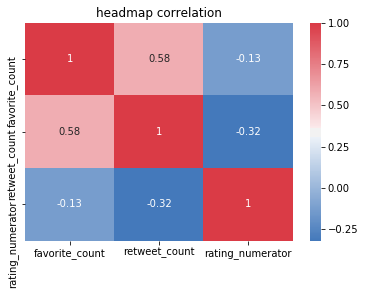

In [19]:
corr = tweets_df[['favorite_count','retweet_count','rating_numerator']].corr()
fig = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(250, 10, as_cmap=True), annot=True)
fig.set_title("headmap correlation")
plt.show(fig)

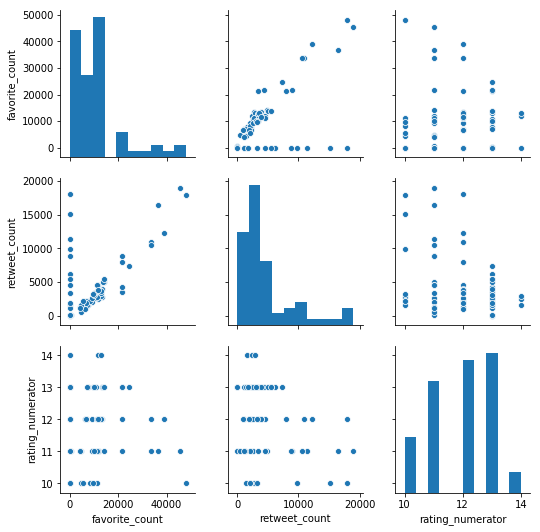

In [21]:
fig = sns.pairplot(tweets_df[['favorite_count','retweet_count','rating_numerator']])
plt.show(fig)

From these chart above there is clear a linear correlation between `favorite_count` and `retweet_count` with correlation coefficient of 0.58, unlike `rating_numerator` there is not correlation between it and any of other variables, and that makes scene as mostly the more tweet has retweet the more has favorite and vice versa, so with these correlation we can't predect dog rating based on favorite count and retweet countwith  at least with linear models.